In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Customer segmentation lets you
do just that – abstract potentially millions of customers to a few segments and
understand their characteristics and needs. With such understanding, the impact
you can realize is tremendous. You can send more directed and targeted messaging
through marketing campaigns, offer differential services, make better product
recommendations, and more to make the overall customer experience better; all
these leading to a significant business impact – not just an immediate revenue impact
through more efficient marketing campaigns, but also a significant positive impact on
the long-term value that customers bring to the platform.<br>
A general customer segmentation exercise involves the following key steps:
1. Choosing the relevant attributes for the entities
2. Clustering/grouping the entities
3. Understanding and describing the segments

# Exercise 3.01: Mall Customer Segmentation – Understanding the Data

In [2]:
# reading the data
df = pd.read_csv("../Chapter03/Datasets/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# changing the column name
df.rename({
    "Annual Income (k$)": "Income",
    "Spending Score (1-100)":"Spend_score"
}, axis = "columns", inplace = True)

In [5]:
df

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# descriptive summary of numerical feature
df.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exercise 3.02: Traditional Segmentation of Mall Customers

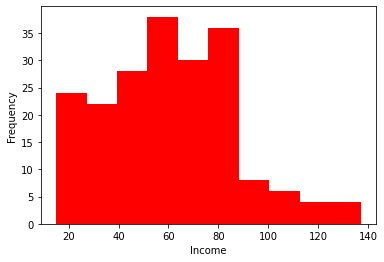

In [7]:
df.Income.plot(kind = "hist", color = "red")
plt.xlabel("Income")
plt.show()

Beyond 90k, the frequency in the bins falls sharply and it seems that these
customers can naturally be considered a separate group representing highincome
customers. A good proportion of customers seems to lie in the 50k-90k
range. These can be considered moderate-income customers. Customers
earning less than 40k would be low-income customers. We can use these cutoffs
to divide the customers into three group

In [8]:
df.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Create a new column, Cluster, to have the Low Income, Moderate Income, and High earners values for customers 
# with incomes in the ranges < 50, 50–90, and >= 90 respectively

df["Cluster"] = np.where(df["Income"]>= 90, "High earners", \
                        np.where(df["Income"] < 50, "Low Income", \
                                "Moderate Income"))
df

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,19,15,39,Low Income
1,2,Male,21,15,81,Low Income
2,3,Female,20,16,6,Low Income
3,4,Female,23,16,77,Low Income
4,5,Female,31,17,40,Low Income
...,...,...,...,...,...,...
195,196,Female,35,120,79,High earners
196,197,Female,45,126,28,High earners
197,198,Male,32,126,74,High earners
198,199,Male,32,137,18,High earners


In [10]:
# check the number of customers in each cluster and confirm whether the values for the Income column in the 
# clusters are in the correct range, get a descriptive summary of Income for these groups
df.groupby("Cluster")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


# Unsupervised Learning (Clustering) for Customer Segmentation
Another method for performing customer segmentation is using unsupervised
machine learning. It is often a very powerful technique as it tends to pick up
on patterns in data that might otherwise be missed. It is perfect for customer
segmentation because it finds data points that are most like each other and groups
them together, which is exactly what good customer segmentation techniques
should do.<br>
Unsupervised learning is the branch of machine learning wherein we do not
have some "ground truth" to verify our solutions. In clustering, we do not
have a notion of true clusters that the customers belong to, against which
we can validate the clusters we obtained.<br>
Clustering is a type of unsupervised machine learning technique that looks
for groups or clusters in data without knowing them ahead of time. The
following are some of the advantages and disadvantages of using clustering for
customer segmentation.
Here are the advantages of clustering:
1. Can find customer groups that are unexpected or unknown to the analyst
2. Flexible and can be used for a wide range of data
3. Reduces the need for deep expertise about connections between the
demographics of customers and behaviors
4. Quick to perform; scalable to very large datasets
<br>
Here are the disadvantages of clustering:
1. Customer groups created may not be easily interpretable.
2. If data is not based on consumer behavior (such as products or services
purchased), it may not be clear how to use the clusters that are found.<br>

# Choosing Relevant Attributes (Segmentation Criteria)
Let's say we wish to segment customers solely by their purchase frequency and
transaction value. In such a situation, attributes such as age, gender, or other
demographic data would not be relevant. On the other hand, if the intent is to
segment customers purely on a demographic basis, their purchase frequency and
transaction value would be the attributes that won't be relevant to us.
A good criterion for segmentation could be customer engagement, involving features
such as time spent on the site, visits to the platform in a defined time period, pages
viewed on a website, days since the last login, and so on. When working with a
dataset involving this type of data, we would need to store the data for each entity,
say, a customer, in a row. The values for each row in the data would be representative
of a customer, more generally, of each entity of interest (time spent on the site, for
example) in the dataset. This type of representation helps compare one entity with
other entities in the dataset.

# Standardizing Data
While there are multiple ways to standardize or rescale features, one popular way
that is employed for clustering is standard scaling, that is, to calculate their z-score.
This is done in two steps, for each column:
1. First, subtract the mean of the data from each data point. This centers the data around 0, to make the data easier to look at and interpret, although this is not strictly required for clustering.
2. The second step is to divide the parameters by their standard deviation.

The standard deviation is a measure of how spread out our points are. It is calculated
by comparing the average of the data to each data point. Data such as income, where
the points can be spread out by many thousands, will have much larger standard
deviations than data such as age, where the differences between the data points tend
to be much smaller. The following formula is used for calculating the standardized
value of a data point:

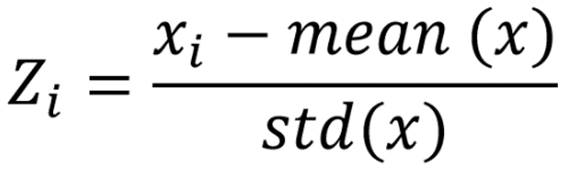

Here, Zi corresponds to the ith standardized value, x represents all values, mean(x) is
the mean value of all x values, and std(x) is the standard deviation of the x values.

The scaler object has methods to fit on a given dataset. Fitting here would
mean calculating the mean and the standard deviation for each of the columns. To
apply the transformation, you simply need to use the transform method of the
scaler object. To perform both of these actions in a single step, calculate the mean
and standard deviation (that is, fit) and then apply the transformation (that is,
transform), or you can simply use the fit_transform method. <br><br>
Standardizing ensures all variables have a similar influence on cluster
formation. While it is standard practice, in business situations you should
evaluate whether all variables having a similar influence align with business
requirements. Based on the business domain and task at hand, you may
sometimes want certain variables to direct and influence the clusters more
than the others. Accomplishing this can be done simply by keeping these
variables at a different scale than the others.

# Exercise 3.03: Standardizing Customer Data

In [11]:
# Import the StandardScaler method from sklearn and create an instance of StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spend_score', 'Cluster'], dtype='object')

In [13]:
# Create a list named cols_to_scale to hold the names of the columns you wish to scale, namely, Age, Income, 
# and Spend_score
col_to_scale = ['Age', 'Income', 'Spend_score']

# make a copy of the DataFrame (to retain original values) and name it data_scaled
data_scaled = df.copy()

In [14]:
# Using the fit_transform method of the scaler, apply the transformation to the chosen columns:
data_scaled[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [15]:
# To verify that this worked, print a descriptive summary of these modified columns:
data_scaled[col_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


The mean value for all the columns is practically 0 and the standard deviation
for all is 1. This confirms that the standardization has worked. This ensures that all columns get equal
weightage when calculating the similarity or distance between customers.

# Calculating Distance
An alternate way of clustering is to calculate
the dissimilarity between entities. This way, we can understand how different (or far
apart) the entities are. The geometric distance between entities in the feature space
is a natural way of measuring dissimilarity. On a two-dimensional scatter plot, the
Euclidean distance between two customers is just the distance between their points<br>
For two data points, p and q, the distance between them is calculated as follows:
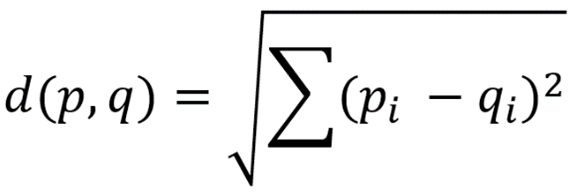
Here, p = (p1+p2+...pn), q = (q1+q2+...qn), and n is the number of features.

# Exercise 3.04: Calculating the Distance between Customers

In [16]:
#From the dataset (data_scaled created in Exercise 3.03, Standardizing Customer Data), extract the top three 
#records with the Income and Spend_score fields into a dataset named cust3 and print the dataset,

sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [17]:
# import the cdist method from scipy.spatial.distance
from scipy.spatial.distance import cdist


In [18]:
# To calculate the distance between the customers in cust3, provide the cust3 dataset as both data inputs to 
# cdist, specifying euclidean as the metric,

cdist(cust3, cust3, metric = "euclidean")

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [19]:
# Verify that 1.6305 is indeed the Euclidean distance between customer 1 and customer 2, by manually calculating
np.sqrt((-1.738999 + 1.738999 )**2 + (-0.434801 - 1.195704) ** 2)

1.630505

# K-Means Clustering
K-means clustering is a very common unsupervised learning technique with a wide range of applications. It is powerful because it is conceptually relatively simple, scales to very large datasets, and tends to work well in practice.<br><br>
K-means clustering is an algorithm that tries to find the best way of grouping data points into k different groups, where k is a parameter given to the algorithm. The algorithm then works iteratively to try to find the best grouping. There are two steps to this algorithm:
1. The algorithm begins by randomly selecting k points in space to be the centroids of the clusters. Each data point is then assigned to the centroid that is closest to it.
2. The centroids are updated to be the mean of all of the data points assigned to them. The data points are then reassigned to the centroid closest to them.<br><br>
Step 2 is repeated until none of the data points change the centroid they are assigned to after the centroid is updated.<br><br>
It tends to find good groupings while still being computationally inexpensive even for large datasets. K-means clustering is fast and easily scalable and is, therefore, the most common clustering algorithm used.

<br>the fit method of the KMeans object creates the specified number of clusters from the dataset. cols is a list containing the columns from the data dataset to be used for clustering. After the model has been fit, the predict method is used to extract the cluster assignments for each record in the dataset. The cluster assignments can be added to the original dataset as a new column<br>


# Exercise 3.05: K-Means Clustering on Mall Customers

In [20]:
from sklearn.cluster import KMeans

In [21]:
#You will perform k-means clustering on the mall customer data that was standardized in the previous exercise. 
# You will use only the Income and Spend_score columns.

In [22]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


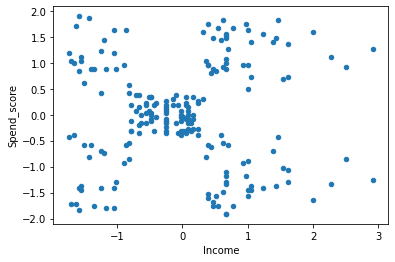

In [23]:
# Visualize the data using a scatter plot with Income and Spend_score on the x and y axes respectively

data_scaled.plot(kind = "scatter", x = "Income", y = "Spend_score")
plt.show()

# From the plot, there are 5 natural clusters in the data. This tells us that we need to specify 5 as the 
#number of clusters for the k-means algorithm.

In [24]:
# Import KMeans from sklearn.cluster. Create an instance of the KMeans model specifying 5 clusters (n_clusters) 
# and 42 for random_state
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5, random_state=42)


In [25]:
# fit the model on the data using the columns in cluster_cols for the purpose. Using the predict method of the 
# k-means model, assign the cluster for each customer to the 'Cluster' variable. 
# Print the first three records of the data_scaled dataset

model.fit(data_scaled[cluster_cols])
data_scaled["Cluster"] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,3
1,2,Male,-1.281035,-1.738999,1.195704,0
2,3,Female,-1.352802,-1.700830,-1.715913,3


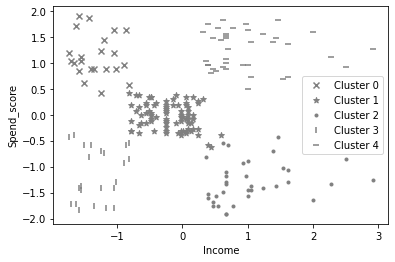

In [26]:
# Now you need to visualize it to see the points assigned to each cluster. Plot each cluster with a marker. 
#You will subset the dataset for each cluster and use a dictionary to specify the marker for the cluster:
markers = ['x', '*', '.', '|', '_']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker = markers[clust], color = "gray",
               label = "Cluster " + str(clust))

plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

# Understanding and Describing the Clusters

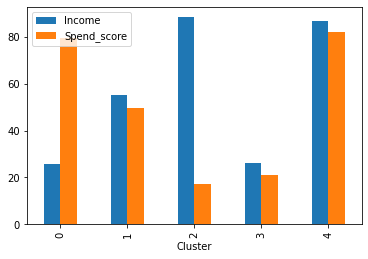

In [27]:
df["Cluster"] = data_scaled.Cluster
df.groupby('Cluster')[['Income', 'Spend_score']].mean().plot(kind = "bar")
plt.show()

# Activity 3.01: Bank Customer Segmentation for Loan Campaign

In [28]:
#Import the necessary libraries for data processing, visualization, and clustering.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
# Load the data into a pandas DataFrame and display the top five rows
df = pd.read_csv("../Chapter03/Datasets/Bank_Personal_Loan_Modelling-1.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Experience: The work experience of the customer in years
1. Income: The estimated annual income of the customer (thousands of US dollars)
2. CCAvg: The average spending on credit cards per month (thousands of US dollars)
3. Mortgage: The value of the customer's house mortgage (if any)
4. Age: The age (in years) of the customer

In [30]:
# Using the info method, get an understanding of the columns and their types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [31]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [32]:
# Perform standard scaling on the Income and CCAvg columns to create new Income_scaled and CCAvg_scaled columns.
cols_to_scale = ["Income", "CCAvg"]
df_scaled = df.copy()

scaler = StandardScaler()

df_scaled[["Income_scaled", "CCAvg_scaled"]] = scaler.fit_transform(df[cols_to_scale])
df_scaled[["Income_scaled", "CCAvg_scaled"]].head()




,Income_scaled,CCAvg_scaled
0,-0.538229,-0.193385
1,-0.864109,-0.250611
2,-1.363793,-0.536736
3,0.569765,0.436091
4,-0.625130,-0.536736


In [33]:
#Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.
df_scaled[["Income_scaled", "CCAvg_scaled"]].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


The mean value for all the columns is practically 0 and the standard deviation for all is 1. This confirms that the standardization has worked. This ensures that all columns get equal weightage when calculating the similarity or distance between customers.

<AxesSubplot:xlabel='Income_scaled', ylabel='CCAvg_scaled'>

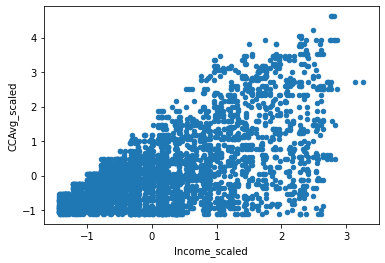

In [34]:
# creating scatter plot to check the distribution
df_scaled[["Income_scaled", "CCAvg_scaled"]].plot(kind = "scatter", x = "Income_scaled", y = "CCAvg_scaled")

In [35]:
# Perform k-means clustering, specifying 3 clusters using Income and CCAvg as the features. 
# Specify random_state as 42 (an arbitrary choice) to ensure the consistency of the results. 

model = KMeans(n_clusters=3, random_state = 42)
model.fit(df_scaled[cols_to_scale])


# Create a new column, Cluster, containing the predicted cluster from the model.
df_scaled["Cluster"] = model.predict(df_scaled[cols_to_scale])

df_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,-0.733757,-0.021710,1
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,-1.276892,-0.880087,1
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,-1.081363,-0.937312,1
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,-0.538229,-0.822862,1


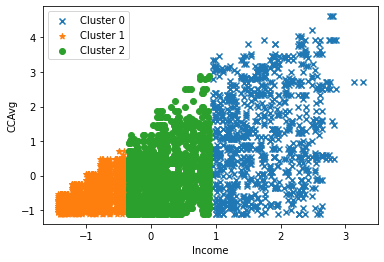

In [36]:
# Visualize the clusters by using different markers for the clusters on a scatter plot between Income and CCAvg.
markers = ["x", "*", "o"]
for clust in range(3):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.Income_scaled, temp.CCAvg_scaled, marker=markers[clust], label = "Cluster " + str(clust))
    
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.legend()
plt.show()

In [37]:
# To understand the clusters, print the average values of Income and CCAvg for the three clusters.
df_scaled.groupby("Cluster")[["Income", "CCAvg"]].mean()

,Income,CCAvg
Cluster,,
0,152.253796,4.041714
1,33.962247,1.034337
2,81.178909,1.949974


<AxesSubplot:xlabel='Cluster'>

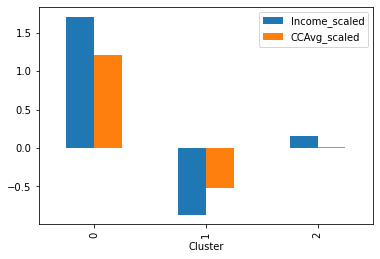

In [38]:
# Perform a visual comparison of the clusters using the standardized values for Income and CCAvg.
df_scaled.groupby("Cluster")[["Income_scaled", "CCAvg_scaled"]].mean().plot(kind = "bar")

In [39]:
df_scaled.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Income_scaled', 'CCAvg_scaled',
       'Cluster'],
      dtype='object')

In [40]:
# To understand the clusters better using other relevant features, print the average values against the 
# clusters for the Age, Mortgage, Family, CreditCard, Online, and Personal Loan features. Check which
# cluster has the highest propensity for taking a personal loan.
df_scaled.groupby("Cluster")[['Age','Mortgage','Family','CreditCard','Online','Personal Loan',
                             'Income', 'CCAvg']].mean()


,Age,Mortgage,Family,CreditCard,Online,Personal Loan,Income,CCAvg
Cluster,,,,,,,,
0,44.432755,91.629067,1.965293,0.295011,0.606291,0.413232,152.253796,4.041714
1,45.883978,40.040976,2.500921,0.296501,0.588398,0.000000,33.962247,1.034337
2,45.154774,58.259706,2.485834,0.290661,0.601784,0.051941,81.178909,1.949974


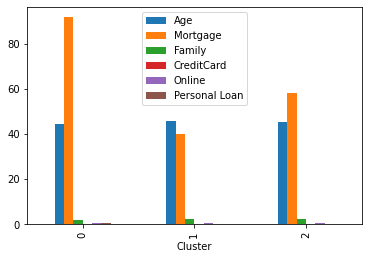

In [41]:
df_scaled.groupby("Cluster")[['Age','Mortgage','Family','CreditCard','Online','Personal Loan']].mean()\
        .plot(kind = "bar")
plt.show()

# Clustering with High-Dimensional Data
Euclidean distance can very well handle multiple dimensions. Once the distance is defined, the usual machine learning algorithms for clustering, say, k-means, can be employed.<br><br>
When we only had two variables and we could easily visualize data points and the clusters formed. With higher-dimensional data, however, we need to first reduce the data to two dimensions.

## Dimensionality reduction
Dimensionality reduction techniques are commonly employed for this. The idea of dimensionality reduction is that multi-dimensional data is reduced, usually to two dimensions, for visualization purposes, in a manner that preserves the distance between the points.
Dimensionality reduction, when applied to our multidimensional dataset, would condense most of the information into two dimensions to enable visualization.

PCA is a method of transforming data. It takes the original features/dimensions and creates new features/dimensions that capture the most variance in the data. In other words, it creates dimensions that contain the most amount of information about the data, so that when you take the first two Principal Components (PCs), that is, dimensions, you are left with most of the information about the data, but reduced to only two dimensions.
<br><br>
from sklearn import decomposition<br>
pca = decomposition.PCA(n_components=N)<br>
pca_res = pca.fit_transform(data[cols])<br><br>
Here, N is the number of PCs to calculate, cols is a list of columns to calculate the PCAs from, and data is the dataset containing these columns. pca_res would contain the transformed data.

# Exercise 3.06: Dealing with High-Dimensional Data

In [42]:
data_scaled.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,3
1,2,Male,-1.281035,-1.738999,1.195704,0
2,3,Female,-1.352802,-1.700830,-1.715913,3
3,4,Female,-1.137502,-1.700830,1.040418,0
4,5,Female,-0.563369,-1.662660,-0.395980,3


In [44]:
# Create a list, cluster_cols, containing the Age, Income, and Spend_score columns, which will be used for 
# clustering. 

cluster_cols = ["Age", "Income", "Spend_score"]


#Print the first three rows of the dataset for these columns:
data_scaled[cluster_cols].head()

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [47]:
# Perform k-means clustering, specifying 4 clusters using the scaled features. Specify random_state as 42. 
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=4)
model.fit(data_scaled[cluster_cols])


#Assign the clusters to the Cluster column
data_scaled["Cluster"] = model.predict(data_scaled[cluster_cols])

In [48]:
data_scaled.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,3
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,3
3,4,Female,-1.137502,-1.700830,1.040418,3
4,5,Female,-0.563369,-1.662660,-0.395980,3


In [49]:
# Using PCA on the scaled columns, create two new columns, pc1 and pc2, containing the data for PC1 and PC2 
#respectively:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled["pc1"] = pca_res[:, 0]
data_scaled["pc2"] = pca_res[:, 1]

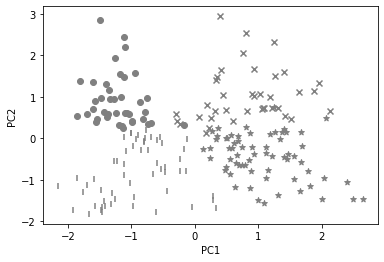

In [50]:
# Visualize the clusters by using different markers and colors for the clusters on a scatter plot between pc1 
# and pc2 using the following code:

markers = ['x', '*', 'o','|']
for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], label="Cluster "+str(clust), color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [53]:
df1 = pd.read_csv("../Chapter03/Datasets/Mall_Customers.csv")
# changing the column name
df1.rename({
    "Annual Income (k$)": "Income",
    "Spending Score (1-100)":"Spend_score"
}, axis = "columns", inplace = True)
df1.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
# print the average values of the original features used for clustering against the four clusters:
df1.Cluster = data_scaled["Cluster"]
df1.groupby("Cluster")[["Age", "Income", "Spend_score"]].mean()


# From the preceding table, you see that the spend score varies significantly between the clusters. 
# This is true for age as well as income.

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,53.984615,47.707692,39.969231
2,32.875000,86.100000,81.525000
3,25.438596,40.000000,60.298246


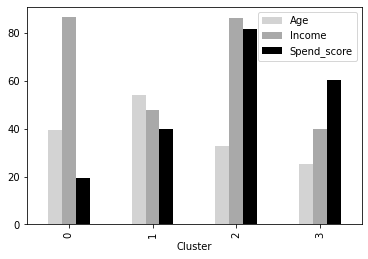

In [59]:
# visualize this information using bar plots. Check which features are the most differentiated for the clusters 
# using the following code:

df1.groupby('Cluster')[['Age', 'Income', \
'Spend_score']].mean() \
.plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.show()

Standardization of the variables, choosing the right criteria for segmentation, and building a good understanding of the clusters are all critical steps.

# Activity 3.02: Bank Customer Segmentation with Multiple Features


In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Create a copy of the dataset named bank_scaled, 
bank_data = pd.read_csv("../Chapter03/Datasets/Bank_Personal_Loan_Modelling-1.csv")
bank_scaled = bank_data.copy()
bank_scaled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# check the column info
bank_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# column name
bank_scaled.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
# perform standard scaling of the Income, CCAvg, Age, Experience, and Mortgage columns.
cols = ["Income", "CCAvg", "Age", "Experience",  "Mortgage"]

scaler = StandardScaler()
scaler.fit(bank_scaled[cols])
bank_scaled[cols] = scaler.transform(bank_scaled[cols])
bank_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.774417,-1.666078,-0.538229,91107,4,-0.193385,1,-0.555524,0,1,0,0,0
1,2,-0.029524,-0.096330,-0.864109,90089,3,-0.250611,1,-0.555524,0,1,0,0,0
2,3,-0.552992,-0.445163,-1.363793,94720,1,-0.536736,1,-0.555524,0,0,0,0,0
3,4,-0.901970,-0.968413,0.569765,94112,1,0.436091,2,-0.555524,0,0,0,0,0
4,5,-0.901970,-1.055621,-0.625130,91330,4,-0.536736,2,-0.555524,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-1.425438,-1.491662,-0.733757,92697,1,-0.021710,3,-0.555524,0,0,0,1,0
4996,4997,-1.338194,-1.404454,-1.276892,92037,4,-0.880087,1,0.280238,0,0,0,1,0
4997,4998,1.540880,1.647835,-1.081363,93023,2,-0.937312,3,-0.555524,0,0,0,0,0
4998,4999,1.715370,1.735043,-0.538229,90034,3,-0.822862,2,-0.555524,0,0,0,1,0


In [9]:
# Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.
bank_scaled[cols].describe()

# mean is zero and std is 1 so the standard scaler has worked correctly

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,9.436896e-20,4.045653e-17,2.478018e-17,3.597123e-17,3.675726e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [12]:
# Perform k-means clustering, specifying 3 clusters using the scaled features. Specify random_state as 42.
model = KMeans(n_clusters = 3, random_state=42)
model.fit(bank_scaled[cols])
bank_scaled["Cluster"] = model.predict(bank_scaled[cols])
bank_scaled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
0,1,-1.774417,-1.666078,-0.538229,91107,4,-0.193385,1,-0.555524,0,1,0,0,0,2
1,2,-0.029524,-0.096330,-0.864109,90089,3,-0.250611,1,-0.555524,0,1,0,0,0,2
2,3,-0.552992,-0.445163,-1.363793,94720,1,-0.536736,1,-0.555524,0,0,0,0,0,2
3,4,-0.901970,-0.968413,0.569765,94112,1,0.436091,2,-0.555524,0,0,0,0,0,2
4,5,-0.901970,-1.055621,-0.625130,91330,4,-0.536736,2,-0.555524,0,0,0,0,1,2


In [13]:
# Using PCA on the scaled columns, create two new columns, pc1 and pc2, containing the data for PC1 and PC2 
pca = PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cols])

bank_scaled["pc1"] = pca_res[:, 0]
bank_scaled["pc2"] = pca_res[:, 1]

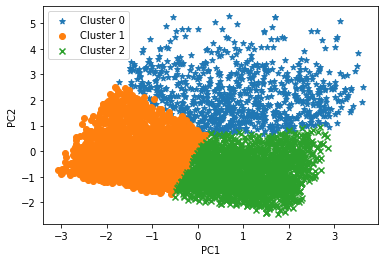

In [18]:
# Visualize the clusters by using different markers for the clusters on a scatter plot between pc1 and pc2.
markers = ["*", "o", "x"]

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster==clust]
    plt.scatter(temp.pc1, temp.pc2, marker = markers[clust], label = "Cluster " + str(clust))
    
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.legend()
plt.show()

In [22]:
# To understand the clusters, print the average values of the features used for clustering against the three 
# clusters. Check which features are the most differentiated for the clusters.
bank_data["Cluster"] = bank_scaled.Cluster
bank_data.groupby("Cluster")[cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357
1,58.941774,1.367514,55.536044,30.233826,45.134935
2,60.124322,1.382121,35.116428,9.873705,44.771584


In [24]:
# To understand the clusters better using other relevant features, print the average values against the clusters
# for the Age, Mortgage, Family,CreditCard, Online, and Personal Loan features and check which cluster has the 
# highest propensity for taking a personal loan.

sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', \
            'Family', 'CreditCard', 'Online', 'Personal Loan']
bank_data.groupby("Cluster")[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
1,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520


<AxesSubplot:xlabel='Cluster'>

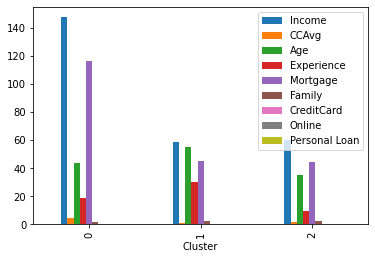

In [25]:
bank_data.groupby("Cluster")[sel_cols].mean().plot(kind = "bar")